In [1]:
#Import the usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random

# Inferential Statistics

1. T test single population mean
1. T test independence double population mean
    1. equal variance
    1. non equal variance
1. T test paired 
1. F test for more than two population mean
1. Proportion Test

## Proportion one population

An newly launched online store want to test whether their conversion rate is greater than 50% or not. So they gathered 1000 visitor data randomly and observed whether they are buying or not. As a Data Scientist you are asked to perform a hypothesis testing whether their conversion rate is greater than 50%?

In [2]:
from statsmodels.stats.proportion import proportions_ztest
import pandas as pd
import numpy as np

In [3]:
visitor_data = np.array(['buying','buying','no buying','buying','no buying','buying','no buying','buying','buying','no buying','buying','buying','buying','no buying','no buying','no buying'])
visitor_data_encoded = np.where(visitor_data == 'buying',1,0)

In [4]:
n_succes = np.sum(visitor_data_encoded) 
n = len(visitor_data_encoded)
success_rate = n_succes/n
print('the succes rate or conversion rate is',success_rate)

the succes rate or conversion rate is 0.5625


Ho : p = 0.5
<br>
Ha : p > 0.5 (is the conversion rate is higher than 50%)

In [5]:
z_stat, p_value = proportions_ztest(n_succes, n, 0.5)

In [6]:
print('p-value',p_value)

p-value 0.6142946646634824


p-value is greater than 0.05, with significant level 5% there is not enouhg evidence that the conversion rate is greater than 50%. 

## Proportion Two Population : Use Case A/B testing categorical measurement

A few months later the online store launched a new web design. They randomly assign visitor to layout A or layout B and 1000 for each design. You are asked again to perform hypothesis testing whether the conversion rate is increasing or not ?

In [7]:
visitor_data_before = np.random.binomial(1, 0.5, 1000)
visitor_data_after = np.random.binomial(1, 0.7, 1000)
visitor_data_before = np.where(visitor_data_before == 1, 'buying','no buying')
visitor_data_after = np.where(visitor_data_after == 1,'buying','no buying')

In [8]:
df_before = pd.DataFrame({
    'layout':'old layout',
    'conversion': visitor_data_before
})

df_after = pd.DataFrame({
    'layout':'new layout',
    'conversion': visitor_data_after    
})

In [9]:
df_full = df_before.append(df_after)
df_full

,layout,conversion
0,old layout,no buying
1,old layout,no buying
2,old layout,no buying
3,old layout,buying
4,old layout,buying
...,...,...
995,new layout,no buying
996,new layout,buying
997,new layout,no buying
998,new layout,buying


In [10]:
pd.crosstab(df_full['layout'], df_full['conversion'])

conversion,buying,no buying
layout,,
new layout,677,323
old layout,522,478


In [11]:
pd.crosstab(df_full['layout'], df_full['conversion'], normalize = 0)

conversion,buying,no buying
layout,,
new layout,0.677,0.323
old layout,0.522,0.478


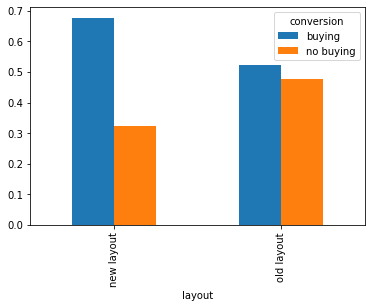

In [12]:
pd.crosstab(df_full['layout'], df_full['conversion'], normalize = 0).plot(kind='bar')

In [13]:
n_succes_before = len(df_full[(df_full['layout']=='old layout')&(df_full['conversion']=='buying')]) 
n_before = len(df_full[(df_full['layout']=='old layout')])
success_rate_before = n_succes_before/n_before
print('the conversion rate before change the web layout is',success_rate_before)

the conversion rate before change the web layout is 0.522


In [14]:
n_succes_after = len(df_full[(df_full['layout']=='new layout')&(df_full['conversion']=='buying')])
n_after = len(df_full[(df_full['layout']=='new layout')])
success_rate_after = n_succes_after/n_after
print('the conversion rate after change the web layout is',success_rate_after)

the conversion rate after change the web layout is 0.677


Ho : p-after = p-before
<br>
Ha : p-after > p-before (the conversion rate after change the web layout is increasing)
<br>
or
<br>
Ho: Amazon.com visitors that receive Layout B will not have higher end-of-visit conversion rates compares to visitors that receive Layout A​
​<br>
Ha: Amazon.com visitors that receive Layout B will have higher end-of-visit conversion rates compared to visitors that receive layout A​


In [15]:
count = np.array([n_succes_before,n_succes_after])
n_obs = np.array([n_before,n_after])

In [16]:
z_stat, p_value = proportions_ztest(count, n_obs)

In [17]:
print('{0:0.5f}'.format(p_value))

0.00000


p-value is lower than 0.05, with significant level 5% there is enough evidence that Amazon.com visitors that receive Layout B will have higher end-of-visit conversion rates compared to visitors that receive layout A​
